In [23]:
import pandas as pd 
import geopandas as gpd
income_data = pd.read_csv("/home/ryanwonhail/project-2-group-real-estate-industry-project-34/data/raw/ABS_Income_including_government_allowances_by_2021_SA2_Nov_2023_4261441096398674898 (1).csv")
sf = gpd.read_file("/home/ryanwonhail/project-2-group-real-estate-industry-project-34/data/SA2 Zones/SA2_2021_AUST_GDA2020.shp")


In [24]:
income_data.count()

OBJECTID                                                                            2473
Statistical Areas Level 2 2021 code                                                 2473
Statistical Areas Level 2 2021 name                                                 2473
Area in square kilometres                                                           2454
Uniform Resource Identifier                                                         2473
                                                                                    ... 
Equivalised total household income: Partial income stated (%) (Data year: 2021)     2341
Equivalised total household income: All incomes not stated (%) (Data year: 2021)    2332
globalid                                                                            2473
Shape__Area                                                                         2454
Shape__Length                                                                       2454
Length: 79, dtype: in

In [25]:
income_data.shape
income_data.columns
print("income test")
print("test")

income test
test


In [26]:
#income_data[income_data["Statistical Areas Level 2 2021 name"] == "Toorak"]
# Filter for the row where the suburb is 'Toorak'
#toorak_row = income_data[income_data["Statistical Areas Level 2 2021 name"] == "Toorak"]
#null_columns_in_toorak = toorak_row.isnull().any()
#null_columns_in_toorak[null_columns_in_toorak == True]

In [27]:
# Check the number of null values in the 'income' column
null_values = income_data.isnull().sum().nlargest(10)
print(null_values)
max_null_values = income_data.isnull().sum().max()
print(max_null_values)


Personal income: Median investment income ($) (Data year: 2020)                                                                  514
Personal income: Total income (excl. Government pensions and allowances): p10/P50 ratio (Data year: 2020)                        493
Personal income: Total income (excl. Government pensions and allowances): Income share of top 1% of earners (Data year: 2020)    487
Personal income: Total superannuation and annuity income ($m) (Data year: 2020)                                                  472
Personal income: Superannuation and annuity income as main source of income (%) (Data year: 2020)                                469
Personal income: Superannuation and annuity income earners (no.) (Data year: 2020)                                               468
Personal income: Superannuation and annuity income earners: Median age (years) (Data year: 2020)                                 468
Personal income: Median superannuation and annuity income ($) (Data y

In [28]:
missing_percentage = income_data.isnull().mean() * 100


high_missing_cols = missing_percentage[missing_percentage > 50]  
print(high_missing_cols)

Series([], dtype: float64)


In [29]:
income_data_cleaned = income_data.dropna()

In [30]:
null_values_clean = income_data_cleaned.isnull().sum()
null_values_clean

OBJECTID                                                                            0
Statistical Areas Level 2 2021 code                                                 0
Statistical Areas Level 2 2021 name                                                 0
Area in square kilometres                                                           0
Uniform Resource Identifier                                                         0
                                                                                   ..
Equivalised total household income: Partial income stated (%) (Data year: 2021)     0
Equivalised total household income: All incomes not stated (%) (Data year: 2021)    0
globalid                                                                            0
Shape__Area                                                                         0
Shape__Length                                                                       0
Length: 79, dtype: int64

In [31]:
income_data_cleaned.head(2)
income_data_cleaned.columns
#1680 Southbank
#877 CBD

Index(['OBJECTID', 'Statistical Areas Level 2 2021 code',
       'Statistical Areas Level 2 2021 name', 'Area in square kilometres',
       'Uniform Resource Identifier',
       'Personal income: Employee income earners (no.) (Data year: 2020)',
       'Personal income: Employee income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total employee income ($m) (Data year: 2020)',
       'Personal income: Median employee income ($) (Data year: 2020)',
       'Personal income: Mean employee income ($) (Data year: 2020)',
       'Personal income: Employee income as main source of income (%) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners (no.) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total own unincorporated business income ($m) (Data year: 2020)',
       'Personal income: Median own unincorporated business income (

In [32]:
# Merge the two dataframes on the common column 'SA2_CODE21'
sf.rename(columns={'SA2_CODE21': 'Statistical Areas Level 2 2021 code'}, inplace=True)
merged_df = sf.merge(income_data_cleaned, how='inner', on='Statistical Areas Level 2 2021 code')


merged_df.count()
merged_df['STE_NAME21'].unique()
merged_df[merged_df['STE_NAME21']== "Victoria"].count()


Statistical Areas Level 2 2021 code                                                 312
SA2_NAME21                                                                          312
CHG_FLAG21                                                                          312
CHG_LBL21                                                                           312
SA3_CODE21                                                                          312
                                                                                   ... 
Equivalised total household income: Partial income stated (%) (Data year: 2021)     312
Equivalised total household income: All incomes not stated (%) (Data year: 2021)    312
globalid                                                                            312
Shape__Area                                                                         312
Shape__Length                                                                       312
Length: 95, dtype: int64

In [33]:
victoria_income = merged_df[merged_df['STE_NAME21'] == 'Victoria']
victoria_income.shape


(312, 95)

In [34]:

columns_to_drop = ['SA2_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'SA3_CODE21', 'SA3_NAME21', 
                   'SA4_CODE21', 'SA4_NAME21', 'GCC_CODE21', 'GCC_NAME21', 'STE_CODE21', 
                   'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 
                   'geometry', 'OBJECTID']


victoria_income_cleaned = victoria_income.drop(columns=columns_to_drop)

victoria_income_cleaned.columns


Index(['Statistical Areas Level 2 2021 code',
       'Statistical Areas Level 2 2021 name', 'Area in square kilometres',
       'Uniform Resource Identifier',
       'Personal income: Employee income earners (no.) (Data year: 2020)',
       'Personal income: Employee income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total employee income ($m) (Data year: 2020)',
       'Personal income: Median employee income ($) (Data year: 2020)',
       'Personal income: Mean employee income ($) (Data year: 2020)',
       'Personal income: Employee income as main source of income (%) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners (no.) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total own unincorporated business income ($m) (Data year: 2020)',
       'Personal income: Median own unincorporated business income ($) (Data yea

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

numeric_columns = victoria_income_cleaned.select_dtypes(include=[np.number]).columns
X_victoria = victoria_income[numeric_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled_victoria = scaler.fit_transform(X_victoria)


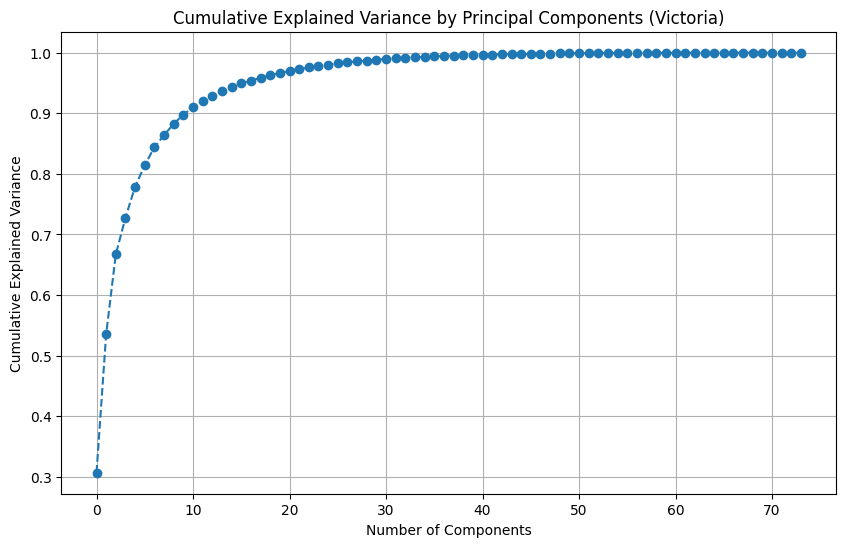

Number of components explaining 90% variance: 11


In [36]:
pca = PCA()
X_pca_victoria = pca.fit_transform(X_scaled_victoria)

#cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components (Victoria)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# I want to choose the number of components that explain at least 90% of variance
n_components_victoria = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) + 1
print(f'Number of components explaining 90% variance: {n_components_victoria}')


In [37]:
from sklearn.linear_model import LinearRegression

# Apply PCA again to extract the selected number of components
pca_victoria_final = PCA(n_components=n_components_victoria)
X_pca_final_victoria = pca_victoria_final.fit_transform(X_scaled_victoria)


regression_model_victoria = LinearRegression()
regression_model_victoria.fit(X_pca_final_victoria, X_pca_final_victoria.mean(axis=1))
victoria_income_cleaned['affluence_score'] = regression_model_victoria.predict(X_pca_final_victoria)


In [39]:

victoria_income_cleaned[['Statistical Areas Level 2 2021 name', 'affluence_score']].head()


affluence_by_suburb_victoria = victoria_income_cleaned.groupby('Statistical Areas Level 2 2021 name')['affluence_score'].mean().reset_index()


affluence_by_suburb_victoria_sorted = affluence_by_suburb_victoria.sort_values(by='affluence_score', ascending=False)

# Display the top 5 suburbs with the highest affluence score
affluence_by_suburb_victoria_sorted.head(10)




,Statistical Areas Level 2 2021 name,affluence_score
50,Carlton,2.526701
277,Toorak,2.217727
83,Doncaster,1.843305
30,Box Hill,1.796711
118,Glen Waverley - East,1.643174
119,Glen Waverley - West,1.605708
23,Bentleigh - McKinnon,1.526309
135,Highton,1.501152
129,Hawthorn East,1.466651
301,Wheelers Hill,1.418571


In [42]:
victoria_income_cleaned.to_csv('victoria_income.csv', index=False)